# 과제. 따릉이 대여량 예측하기

## 데이터 전처리

데이터 변수 설명
- Date : 연월일
- Rented Bike count - 매 시간마다 대여한 자전거 수
- Hour - 하루 중 시간
- Temperature - 온도
- Humidity - 습도 %
- Windspeed - 풍속 m/s
- Visibility - 가시거리 m
- Dew point temperature - 이슬점 온도
- Solar radiation - 태양 복사 MJ/m2
- Rainfall - 강우량 mm
- Snowfall - 적설량 cm
- Seasons - 겨울, 봄, 여름, 가을
- Holiday - 휴일/휴일 없음
- Functional Day - 운영되지 않았던 날, 정상적으로 운영된 날

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [40]:
# train data 불러오기

df_train = pd.read_csv("C:/Users/강태희/Documents/data/train.csv")
df_train.head()

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [41]:
df_train.tail()

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8035,31/10/2018,1507,19,8.4,53,NaN,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes
8036,31/10/2018,1176,20,7.6,59,0.7,2000,0.0,0.0,0.0,0.0,NaN,No Holiday,Yes
8037,31/10/2018,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
8038,31/10/2018,1088,22,6.8,58,2.2,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8039,31/10/2018,798,23,6.4,60,1.8,1930,-0.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [42]:
df_train.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(째C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(째C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8040 non-null   object 
 1   Rented Bike Count          8040 non-null   int64  
 2   Hour                       8040 non-null   int64  
 3   Temperature(째C)            7240 non-null   float64
 4   Humidity(%)                8040 non-null   int64  
 5   Wind speed (m/s)           7238 non-null   float64
 6   Visibility (10m)           8040 non-null   int64  
 7   Dew point temperature(째C)  8040 non-null   float64
 8   Solar Radiation (MJ/m2)    8040 non-null   float64
 9   Rainfall(mm)               8040 non-null   float64
 10  Snowfall (cm)              8040 non-null   float64
 11  Seasons                    7238 non-null   object 
 12  Holiday                    8040 non-null   object 
 13  Functioning Day            8040 non-null   objec

In [44]:
# 결측값 개수 확인하기 
# Temperature, Wind speed, Seasons 에서 결측값 있는걸 확인함, 결측값 처리하기

df_train.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)              800
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
dtype: int64

In [45]:
# 보간법으로 Temperature와 Wind speed 결측값 채우기

df_train['Temperature(째C)'] = df_train['Temperature(째C)'].interpolate(method='linear')
df_train['Wind speed (m/s)'] = df_train['Wind speed (m/s)'].interpolate(method='linear')

In [46]:
# Seasons의 결측값 채우기

# 먼저 Date 열을 datetime 형식으로 변환
df_train['Date'] = pd.to_datetime(df_train['Date'], format='%d/%m/%Y')

# 월을 추출해서 계절을 정의하는 함수
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Seasons 결측값만 해당 함수로 채우기
df_train['Seasons'] = df_train['Seasons'].fillna(df_train['Date'].dt.month.map(get_season))

In [47]:
# 결측값 처리됐는지 확인하기

df_train.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [48]:
#지금 Seasons이랑 Holiday, Functioning Day 와 같은 범주형 변수를 수치형 변수로 나타내야함. 
# saeson은 겨울 봄 여름 가을 순서로 1, 2,3,4의 값을 갖도록 하고 holiday에서는 no holiday의 값을 0으로, holiday의 값을 1로 변환하기

df_train['Seasons'] = df_train['Seasons'].map({'Winter': 1,'Spring': 2,'Summer': 3,'Autumn': 4})

df_train['Holiday'] = df_train['Holiday'].map({'No Holiday': 0,'Holiday': 1})

df_train['Functioning Day']= df_train['Functioning Day'].map({'Yes': 0,'No': 1})

In [52]:
df_train.head()

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,0
4,2017-12-01,78,4,-6.0,36,1.2,2000,-18.6,0.0,0.0,0.0,1,0,0


<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

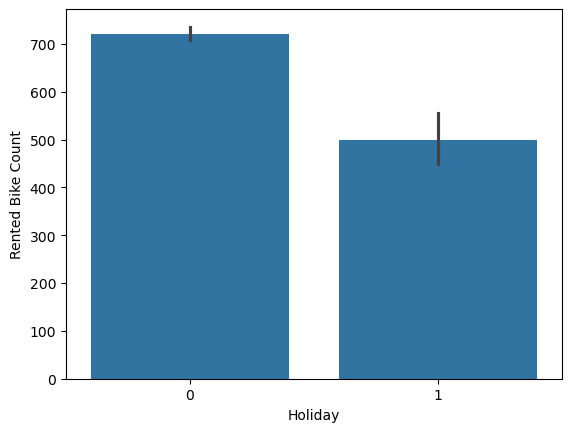

In [51]:
# 공휴일과 자전거 대여량 간 관계 파악하기

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Holiday',y='Rented Bike Count', data=df_train)

C:\Users\강태희\AppData\Local\Temp\ipykernel_23456\66715342.py:13: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  plt.tight_layout()
c:\uni\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


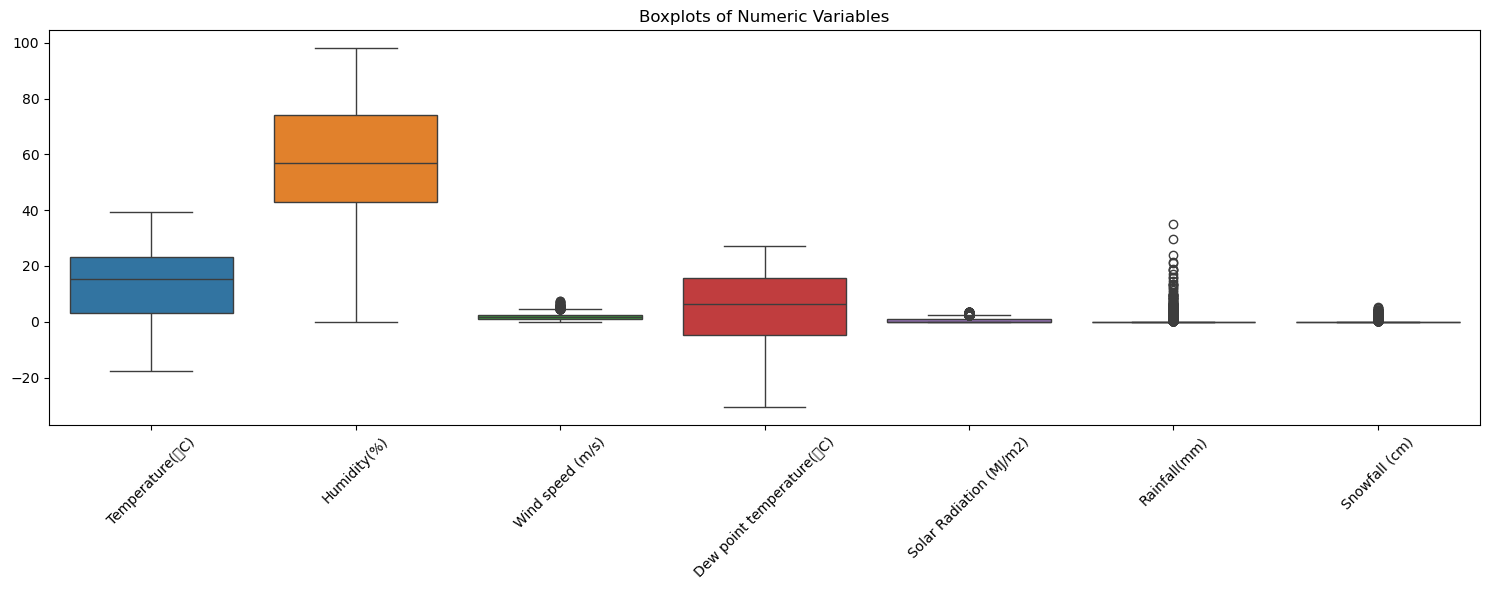

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 박스플롯 그릴 변수들만 선택 (수치형 연속변수 중심으로)
numeric_cols = ['Temperature(째C)', 'Humidity(%)', 'Wind speed (m/s)', 
                'Dew point temperature(째C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# 박스플롯 그리기
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_train[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplots of Numeric Variables")
plt.tight_layout()
plt.show()

<Axes: xlabel='Temperature(째C)', ylabel='Rented Bike Count'>

c:\uni\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  func(*args, **kwargs)
c:\uni\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


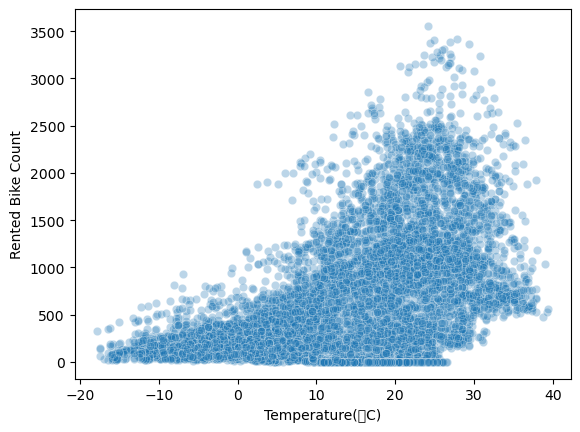

In [50]:
# 온도에 따른 자전거 대여량 나타내기
# 온도가 높을수록 (기온이 따듯할수록) 자전거 대여량이 높다는걸 확인할 수 있음

sns.scatterplot(x='Temperature(째C)', y='Rented Bike Count', data=df_train, alpha=0.3)

<Axes: xlabel='Wind speed (m/s)', ylabel='Rented Bike Count'>

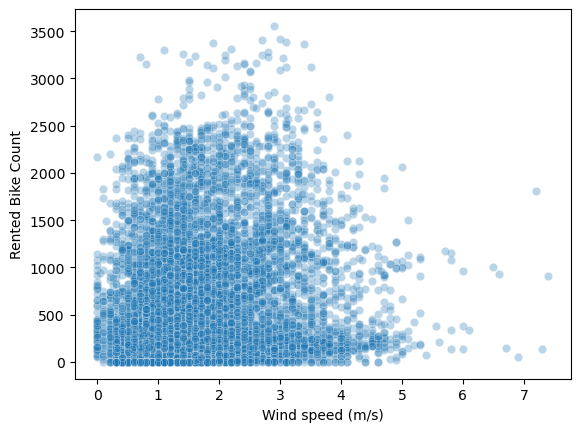

In [34]:
# 풍속에 따른 대여량 나타내기
# 풍속이 낮을수록 대여량이 많다는걸 알 수 있음

sns.scatterplot(x='Wind speed (m/s)', y='Rented Bike Count', data=df_train, alpha=0.3)

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

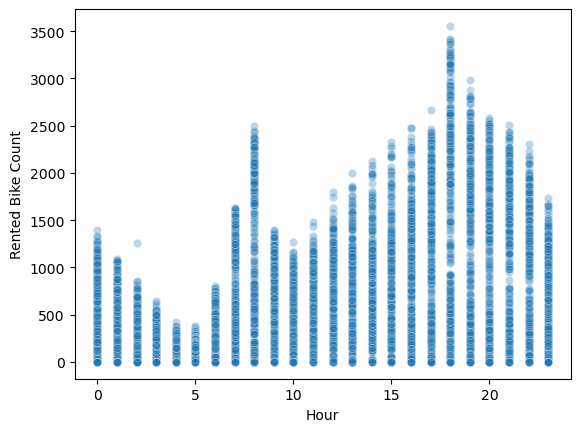

In [36]:
# 시간에 따른 자전거 대여량 나타내기 

sns.scatterplot(x='Hour', y='Rented Bike Count', data=df_train, alpha=0.3)

Solar Radiation이 낮인데 0인건 이상함. 12월- 8시부터 17시/ 1월- 9시부터 18시/ 2월- 8시부터 18시/ 3월- 8시부터 19시/ 4월- 7시부터 19시 / 5월-6시부터 20시/ 

- Temperature: 달의 평균값이나 최빈값이나, 앞 전날의 평균값으로/ 보간법 패키지 (사이의 결측값 채우기, 시계열 데이터)
             df.interpolate(method='linear')
- Wind speed: 온도와 똑같은 방법으로 하기
- Seasons: 12-2월까지 겨울, 3월부터 ...

- 상관계수 파악하기
- 이상치 파악하기
- 시각화하면서 변수 파악해보기 
- 계절, holiday 수치형 변수로 나타내기 
- 결측치 같은 것들도 nall로 변환 후 결측치 처리하기 (변환)